# Option Pricing Theories and Models

Various models and simulation techniques have been developed to price derivatives. Among these, the Black-Scholes model stands as the pioneering effort to provide a theoretical estimate for the prices of European-style options. To account for the limitations of the Black-Scholes model and incorporate the stochastic nature of volatility, Monte Carlo simulations can be used. These simulations apply the Black-Scholes framework to a large number of simulated asset paths to calculate an average payoff at option maturity.

Beyond the Black-Scholes assumptions, the Heston model introduces stochastic volatility into the pricing equation, acknowledging that volatility is not constant but varies over time. This model is particularly useful in capturing market behaviors that the Black-Scholes model cannot, such as volatility smiles and skews.

In this analysis, we will:
- Calculate theoretical option prices using the Black-Scholes formula.
- Simulate option prices using Monte Carlo simulations based on the Black-Scholes model.
- Employ the Heston model to simulate option prices, taking into account stochastic volatility.

By comparing these approaches, we aim to gain a deeper understanding of the pricing mechanisms and the potential benefits and limitations of each method.

## 1. Black-Scholes Formula

The Black-Scholes model is one of the most important concepts in modern financial theory. Developed in 1973 by Fisher Black, Robert Merton, and Myron Scholes, the model provides a theoretical estimate of the price of European-style options.

The formula for a non-dividend paying underlying asset is given by:

For a Call Option:
$$ C(S, t) = S_0 N(d_1) - K e^{-r(T-t)} N(d_2) $$

For a Put Option:
$$ P(S, t) = K e^{-r(T-t)} N(-d_2) - S_0 N(-d_1) $$

where:
- $C(S, t)$ and $P(S, t)$ are the prices of the call and put options respectively.
- $S_0$ is the current price of the asset.
- $K$ is the strike price of the option.
- $T$ is the time to maturity.
- $r$ is the risk-free interest rate.
- $N$ is the cumulative distribution function of the standard normal distribution.
- $d_1$ and $d_2$ are intermediate variables given by:

$$ d_1 = \frac{\ln \left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T-t)}{\sigma \sqrt{T-t}} $$

$$ d_2 = d_1 - \sigma \sqrt{T-t} $$

- $\sigma$ is the volatility (standard deviation of the asset's log returns).

To calculate theoretical price of the option:

In [3]:
from Pricer.Option_Pricer import OptionPricer

initial_variance = 0.08
kappa = 3.0
theta = 0.1
sigma = 0.25
rho = -0.8
mu = 0.05
spot_price=100
strike_price=100
maturity=15
risk_free_rate=0.05
volatility=0.3

In [4]:
opt_pricer = OptionPricer(spot_price, strike_price, maturity, risk_free_rate, volatility, initial_variance, 
                          kappa, theta, sigma, rho, mu)

In [7]:
# Calculate the theoretical price of a call option
call_price_bs = opt_pricer.price_option_black_scholes(option_type='call')
print(f"Theoretical call option price: {call_price_bs:.2f}")

# Calculate the theoretical price of a put option
put_price_bs = opt_pricer.price_option_black_scholes(option_type='put')
print(f"Theoretical put option price: {put_price_bs:.2f}")

Theoretical call option price: 64.16
Theoretical put option price: 11.40


## 2. Monte Carlo Simulation

Monte Carlo simulation is a powerful numerical method that allows us to simulate the behavior of random variables. In the context of option pricing, we simulate many possible future paths for the stock price, which we can then use to estimate the price of an option.

We simulate the future stock price $S_T^i$ at time $T$ for the $i^{th}$ path using the formula:

$$ S_T^i = S_0 e^{(r - \frac{1}{2}\sigma^2)T + \sigma \sqrt{T} Z_i} $$

where:
- $S_0$ is the current stock price.
- $r$ is the risk-free interest rate.
- $\sigma$ is the volatility of the stock.
- $T$ is the time to maturity of the option.
- $Z_i$ is a random variable from a standard normal distribution representing the random component of stock price movement.

We produce $N$ such simulations for $1 \leq i \leq N$.

For a **European call option**, the payoff function is $(S_T - K)^+$, where $K$ is the strike price and $(x)^+$ denotes the positive part of $x$ (i.e., $x$ if $x > 0$, otherwise $0$). We approximate the expected payoff under the risk-neutral measure $\mathbb{Q}$ as the average of payoffs across all simulated paths:

$$ \mathbb{E}^{\mathbb{Q}}\left[ (S_T - K)^+ \middle| S_0 \right] \approx \frac{1}{N} \sum_{i=1}^N (S_T^i - K)^+ $$

For a **European put option**, the payoff function is $(K - S_T)^+$. Similarly, we approximate the expected payoff as:

$$ \mathbb{E}^{\mathbb{Q}}\left[ (K - S_T)^+ \middle| S_0 \right] \approx \frac{1}{N} \sum_{i=1}^N (K - S_T^i)^+ $$

By discounting these expected payoffs back to the present value using the risk-free rate, we can estimate the fair price of the option.

$$ \text{Option Price} = e^{-rT} \frac{1}{N} \sum_{i=1}^{N} \text{Payoff}(S_T^{(i)}) $$

where $N$ is the number of simulated paths and $S_T^{(i)}$ is the simulated asset price at maturity for each path.

In [8]:
# Simulate the call option price using Monte Carlo
simulated_call_price_bs, call_std_err_bs, call_time_bs = opt_pricer.simulate_option_price_monte_carlo_gbm(option_type='call', num_simulations=10000000)
print(f"Simulated call option price: {simulated_call_price_bs:.2f}, Std Err: {call_std_err_bs:.2f}, Time: {call_time_bs:.2f} seconds")

# Simulate the put option price using Monte Carlo
simulated_put_price_bs, put_std_err_bs, put_time_bs = opt_pricer.simulate_option_price_monte_carlo_gbm(option_type='put', num_simulations=10000000)
print(f"Simulated put option price: {simulated_put_price_bs:.2f}, Std Err: {put_std_err_bs:.2f}, Time: {put_time_bs:.2f} seconds")

Simulated call option price: 64.15, Std Err: 0.05, Time: 0.30 seconds
Simulated put option price: 11.40, Std Err: 0.00, Time: 0.28 seconds


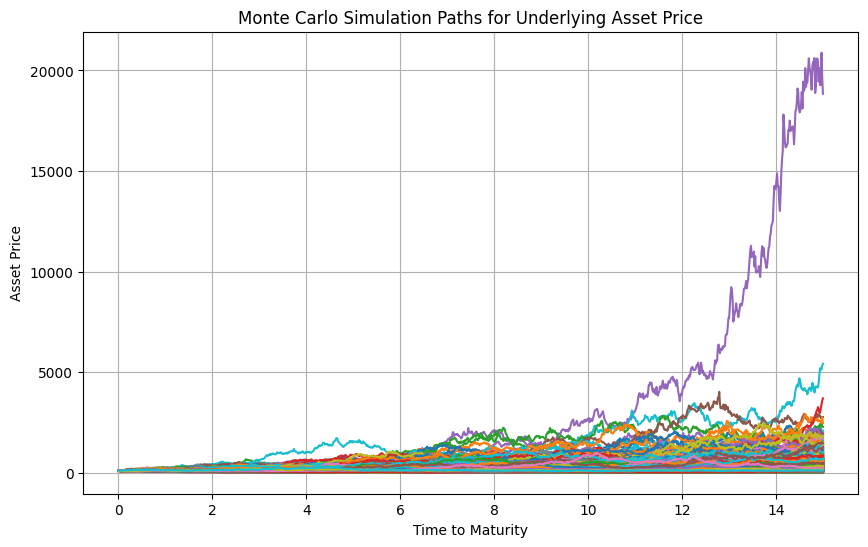

In [9]:
# Plot a sample of Monte Carlo simulation paths
opt_pricer.plot_simulation_paths_monte_carlo_gbm(num_paths=2000, num_time_steps=1000)

## 3. Heston Model

The Heston model provides a more sophisticated way of modeling options by incorporating stochastic volatility. Unlike the Black-Scholes model, which assumes constant volatility, the Heston model allows volatility to fluctuate over time according to a mean-reverting square root process. This can capture more complex market phenomena such as volatility clustering and the leverage effect.

### The Stochastic Processes

In the Heston model, the asset price $S_t$ and its variance $v_t$ are described by the following stochastic differential equations (SDEs):

$$
\begin{align*}
dS_t &= \mu S_t dt + \sqrt{v_t} S_t dW_t^S, \\
dv_t &= \kappa (\theta - v_t) dt + \sigma \sqrt{v_t} dW_t^v,
\end{align*}
$$

where:
- $\mu$ is the risk-neutral drift rate of the asset.
- $\kappa$ is the rate of mean reversion for the variance.
- $\theta$ is the long-term mean variance.
- $\sigma$ is the volatility of volatility (vol of vol).
- $dW_t^S$ and $dW_t^v$ are Wiener processes for the asset price and variance, with correlation $\rho$.

### Correlation Between Processes

The two Wiener processes are correlated, which means that the asset returns are correlated with volatility changes. The correlation coefficient $\rho$ measures how strongly the two processes are linked. It is typical for $\rho$ to be negative, reflecting the tendency for volatility to increase as asset prices decrease.

### Pricing Options with the Heston Model

Option pricing within the Heston framework typically requires numerical solutions, as closed-form solutions are not generally available except for European options with certain conditions. Monte Carlo simulation is a common method used to estimate the price of options under the Heston model.

A Monte Carlo estimator for a European call option's price under the Heston model can be expressed as:

$$
C_0 = e^{-rT} \frac{1}{N} \sum_{i=1}^N \max(S_T^i - K, 0),
$$

where $C_0$ is the current call option price, $T$ is the time to maturity, $r$ is the risk-free rate, $N$ is the number of simulated paths, $S_T^i$ is the simulated asset price at maturity for the $i^{th}$ path, and $K$ is the strike price.

Similarly, for a European put option:

$$
P_0 = e^{-rT} \frac{1}{N} \sum_{i=1}^N \max(K - S_T^i, 0).
$$

To implement the Monte Carlo simulation, we discretize the time to maturity into $M$ steps and simulate $N$ paths of both $S_t$ and $v_t$ using the Euler-Maruyama method to approximate the continuous SDEs. We then calculate the payoffs for each path at maturity and take their average, discounted at the risk-free rate, to estimate the option price.

The Heston model's ability to reflect the dynamic nature of volatility makes it a valuable tool for option traders and risk managers, providing a more realistic framework for pricing and hedging options in practice.

In [11]:
# Simulate the call option price using Heston
simulated_call_price_heston = opt_pricer.price_option_heston_monte_carlo(num_paths=2000, num_time_steps=1000, option_type = "call")
print(f"Simulated Heston call option price: {simulated_call_price_heston:.2f}")

# Simulate the put option price using Heston
simulated_put_price_heston = opt_pricer.price_option_heston_monte_carlo(num_paths=2000, num_time_steps=1000, option_type = "put")
print(f"Simulated Heston put option price: {simulated_put_price_heston:.2f}")

Simulated Heston call option price: 66.03
Simulated Heston put option price: 13.03


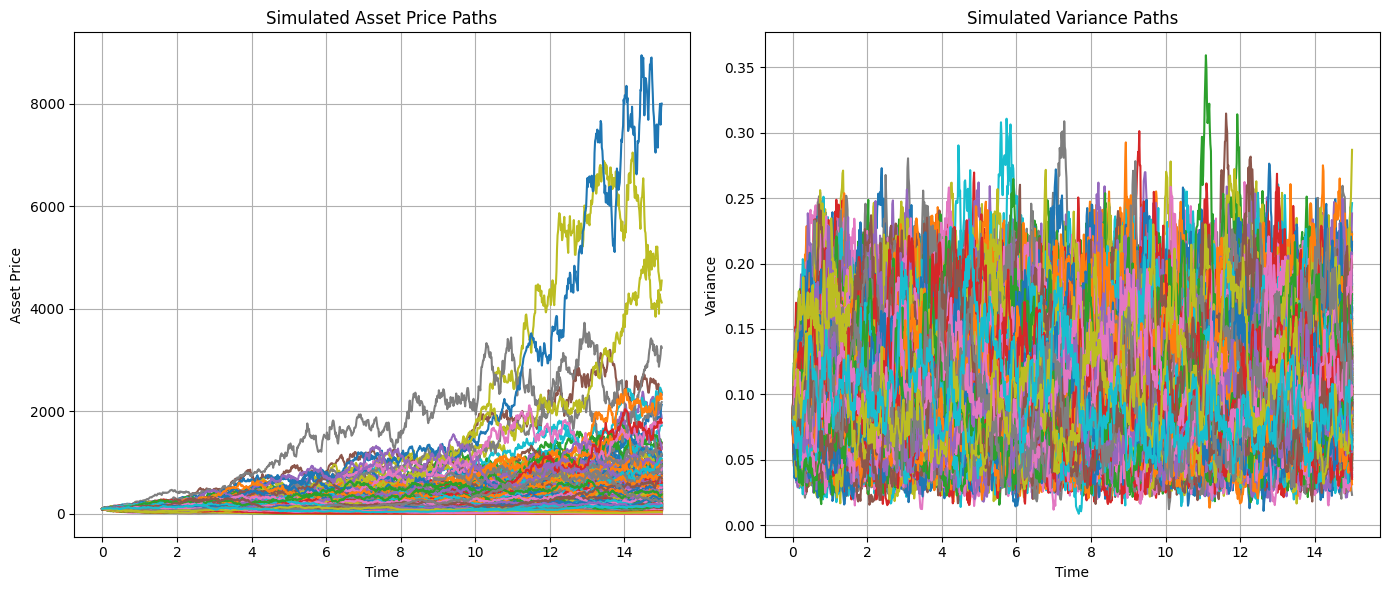

In [12]:
asset_prices, variances = opt_pricer.simulate_heston_paths(num_paths=2000, num_time_steps=1000)
opt_pricer.plot_heston_paths(asset_prices, variances)